In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import numba

In [2]:
@numba.jit(nopython=True, parallel=True)
def sim_profits(s,p=0.5,S=20,sim_length=1e10,X0=5,c=1):
    def compute_profit(X,D,s,c,S):
        h = X+(S-X)*(X<=s)
        return min(h,D)-c*(X<=s)
    
    def G(X,D,s,S):
        if X<=s:
            return max(S-D,0)
        else:
            return max(X-D,0)
    
    X = np.empty(sim_length)
    X[0] = X0
    profit = np.empty(sim_length)
    D = np.random.geometric(p) - 1
    profit[0] = compute_profit(X0,D,s,c,S)
    
    for t in range(sim_length-1):
        D = np.random.geometric(p) - 1
        X[t+1] = G(X[t],D,s,S)
        profit[t+1] = compute_profit(X[t],D,s,c,S)
    mean_profits = profit.mean()
    return mean_profits

In [3]:
def plot_profits(p=0.5,S=20,sim_length=100,X0=5,c=1):
    sgrid = np.linspace(0,S,100)
    profits = []
    smin = sgrid[0]
    smax = sgrid[-1]
    
    for s in sgrid:
        mean_profit = sim_profits(s,p=p,S=S,sim_length=sim_length,X0=X0,c=c)
        profits.append(mean_profit)
    profits = np.asarray(profits)
    max_profit = np.max(profits)
    max_profit_s = sgrid[np.argmax(profits)]
    
    fig,ax = plt.subplots()
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
        ax.spines[spine].set_color('green')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
        
    ax.plot(sgrid,profits,'b-',label='X0={0},c={1}'.format(X0,c))
    ax.plot((0,max_profit_s),(max_profit,max_profit),'k',ls='dotted')
    ax.plot((max_profit_s,max_profit_s),(0,max_profit),'k',ls='dotted')
    ax.set_xticks([smin,max_profit_s,smax])
    ax.set_yticks([max_profit])
    ax.set_xlabel('s')
    ax.set_ylabel('average profits')
    ax.legend(loc='best')
    plt.show()
    

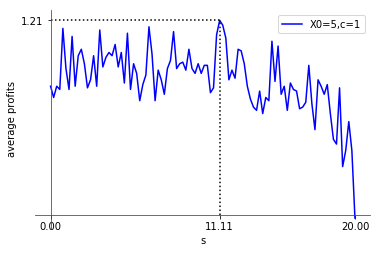

Wall time: 1.07 s


In [4]:
%time plot_profits()